<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

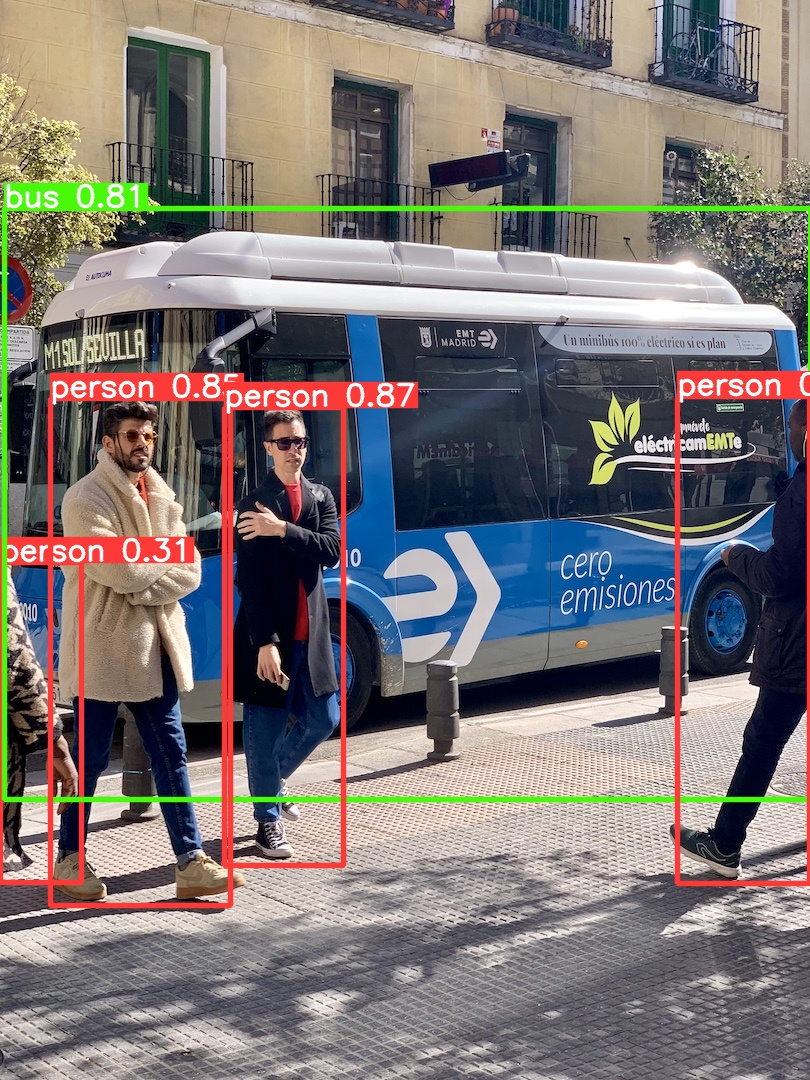

In [ ]:
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 166M/166M [00:01<00:00, 110MB/s]

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
val: Scanning '../datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:03<00:00, 1484.60it/s]
val: New cache created: ../datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [09:44<00:00,  3.72s/it]
                 all       5000      36335      0.732      0.628      0.683      0.496
Speed: 0.2ms pre-process, 107.2ms inference, 2.2ms NM

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-48-g84a8099 torch 1.10.0+cu102 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=

#4. Whole Process

- YOLO pipeline : [link](https://www.researchgate.net/figure/The-detection-pipeline-of-YOLO-the-input-image-is-divided-into-a-S-x-S-grid-where-the_fig3_333360405)
- YOLOv5 model architecture & outputs size : [link](https://github.com/ultralytics/yolov5/issues/1854)
- IoU : [link](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)


![IOU](https://drive.google.com/uc?export=view&id=1rnib-D2-_tKASi0Ca2hK0Z6P1c6bqc1A)

- bounding box format : [link](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)

In [ ]:
import argparse
import os
import sys
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn


from models.common import DetectMultiBackend
from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync

ROOT = './'

weights = ROOT + 'yolov5s.pt'
source=ROOT + 'data/images/'  # file/dir/URL/glob, 0 for webcam
imgsz=(640, 640)  # inference size (height, width)
conf_thres=0.25  # confidence threshold
iou_thres=0.45  # NMS IOU threshold
max_det=1000  # maximum detections per image
device=''  # cuda device, i.e. 0 or 0,1,2,3 or cpu
view_img=False  # show results
save_txt=False  # save results to *.txt
save_conf=False  # save confidences in --save-txt labels
save_crop=False  # save cropped prediction boxes
nosave=False  # do not save images/videos
classes=None  # filter by class: --class 0, or --class 0 2 3
agnostic_nms=False  # class-agnostic NMS
augment=False  # augmented inference
visualize=False  # visualize features
update=False  # update all models
project=ROOT +'runs/detect/'  # save results to project/name
name='exp'  # save results to project/name
exist_ok=False  # existing project/name ok, do not increment
line_thickness=3  # bounding box thickness (pixels)
hide_labels=False  # hide labels
hide_conf=False  # hide confidences
half=False  # use FP16 half-precision inference
dnn=False  # use OpenCV DNN for ONNX inference
save_img = not nosave and not source.endswith('.txt')


In [ ]:
save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)
save_dir

PosixPath('runs/detect/exp2')

In [ ]:
(save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)

In [ ]:
device = select_device(device)

YOLOv5 🚀 v6.0-159-gdb6ec66 torch 1.10.0+cu111 CPU



In [ ]:
model = DetectMultiBackend(weights, device=device, dnn=dnn)
stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
imgsz = check_img_size(imgsz, s=stride)  # check image size
half = False
if pt or jit:
    model.model.half() if half else model.model.float()

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients


In [ ]:
dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
bs = 1  # batch_size

In [ ]:
# dataset.__iter__()
# dataset.__next__()

In [ ]:
seen = 0
for path, im, im0s, vid_cap, s in dataset:
  im = torch.from_numpy(im).to(device)
  im = im.float()
  im /= 255 # 0 - 255 to 0.0 - 1.0
  if len(im.shape) == 3:
    im = im[None] # Expand for batch dim
  
  print(im.shape)
  pred = model(im, augment=False, visualize=False)
  print('before non max suppression', pred.shape)
  pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det) # change the parameter
  print('after non max suppression', pred[0].shape)

  # Process predictions
  for i, det in enumerate(pred):
    seen += 1
    p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)
    p = Path(p)  # to Path
    save_path = str(save_dir / p.name)  # im.jpg
    s += '%gx%g ' % im.shape[2:]  # print string
    gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
    imc = im0.copy() if save_crop else im0  # for save_crop
    annotator = Annotator(im0, line_width=line_thickness, example=str(names))
    if len(det):
      # Rescale boxes from img_size to im0 size
      #print('before det[:, :4]', det[:, :4])
      det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()
      #print('after det[:, :4]', det[:, :4])
      # Print results
      for c in det[:, -1].unique():
          n = (det[:, -1] == c).sum()  # detections per class
          s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
      #print(det)
      # Write results
      for *xyxy, conf, cls in reversed(det):
          #print(xyxy, conf, cls)
          if save_img or save_crop or view_img:  # Add bbox to image
              c = int(cls)  # integer class
              label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
              annotator.box_label(xyxy, label, color=colors(c, True))

      im0 = annotator.result()
      # Save results (image with detections)
      cv2_imshow(im0)
  break

In [ ]:
import numpy as np
def nms(bbox, thresh, score=None, limit=None):
    """Suppress bounding boxes according to their IoUs and confidence scores.
    Args:
        bbox (array): Bounding boxes to be transformed. The shape is
            :math:`(R, 4)`. :math:`R` is the number of bounding boxes.
        thresh (float): Threshold of IoUs.
        score (array): An array of confidences whose shape is :math:`(R,)`.
        limit (int): The upper bound of the number of the output bounding
            boxes. If it is not specified, this method selects as many
            bounding boxes as possible.
    Returns:
        array:
        An array with indices of bounding boxes that are selected. \
        They are sorted by the scores of bounding boxes in descending \
        order. \
        The shape of this array is :math:`(K,)` and its dtype is\
        :obj:`numpy.int32`. Note that :math:`K \\leq R`.

    from: https://github.com/chainer/chainercv
    """
    bbox = np.array(bbox)
    score = np.array(score)
    if len(bbox) == 0:
        return np.zeros((0,), dtype=np.int32)

    if score is not None:
        #print(score)
        order = score.argsort()[::-1]
        bbox = bbox[order]
    bbox_area = np.prod(bbox[:, 2:] - bbox[:, :2], axis=1)

    selec = np.zeros(bbox.shape[0], dtype=bool)
    for i, b in enumerate(bbox):
        tl = np.maximum(b[:2], bbox[selec, :2])
        br = np.minimum(b[2:], bbox[selec, 2:])
        area = np.prod(br - tl, axis=1) * (tl < br).all(axis=1)

        iou = area / (bbox_area[i] + bbox_area[selec] - area)
        if (iou >= thresh).any():
            continue

        selec[i] = True
        if limit is not None and np.count_nonzero(selec) >= limit:
            break

    selec = np.where(selec)[0]
    if score is not None:
        selec = order[selec]
    return selec.astype(np.int32)


In [ ]:
from utils.general import *
def non_max_suppression(prediction, conf_thres=0.25, iou_thres=0.45, classes=None, agnostic=False, multi_label=False,
                        labels=(), max_det=300):
    """Runs Non-Maximum Suppression (NMS) on inference results

    Returns:
         list of detections, on (n,6) tensor per image [xyxy, conf, cls]
    """

    nc = prediction.shape[2] - 5  # number of classes
    print('nc', nc)
    xc = prediction[..., 4] > conf_thres  # candidates
    print('xc len ',xc.shape,'sum : ', torch.sum(xc))
    # Checks
    assert 0 <= conf_thres <= 1, f'Invalid Confidence threshold {conf_thres}, valid values are between 0.0 and 1.0'
    assert 0 <= iou_thres <= 1, f'Invalid IoU {iou_thres}, valid values are between 0.0 and 1.0'

    # Settings
    min_wh, max_wh = 2, 4096  # (pixels) minimum and maximum box width and height
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
    time_limit = 10.0  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label &= nc > 1  # multiple labels per box (adds 0.5ms/img)
    merge = False  # use merge-NMS

    t = time.time()
    output = [torch.zeros((0, 6), device=prediction.device)] * prediction.shape[0]
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x[xc[xi]]  # confidence

        # Cat apriori labels if autolabelling
        if labels and len(labels[xi]):
            l = labels[xi]
            v = torch.zeros((len(l), nc + 5), device=x.device)
            v[:, :4] = l[:, 1:5]  # box
            v[:, 4] = 1.0  # conf
            v[range(len(l)), l[:, 0].long() + 5] = 1.0  # cls
            x = torch.cat((x, v), 0)

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Compute conf
        x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

        # Box (center x, center y, width, height) to (x1, y1, x2, y2)
        box = xywh2xyxy(x[:, :4])

        # Detections matrix nx6 (xyxy, conf, cls)
        if multi_label:
            i, j = (x[:, 5:] > conf_thres).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, j + 5, None], j[:, None].float()), 1)
        else:  # best class only
            conf, j = x[:, 5:].max(1, keepdim=True)
            x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_thres]

        # Filter by class
        if classes is not None:
            x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # Check shape
        n = x.shape[0]  # number of boxes
        if not n:  # no boxes
            continue
        elif n > max_nms:  # excess boxes
            x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        #i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
        i = nms(boxes, iou_thres, scores)
        if i.shape[0] > max_det:  # limit detections
            i = i[:max_det]
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
            iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
            weights = iou * scores[None]  # box weights
            x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
            if redundant:
                i = i[iou.sum(1) > 1]  # require redundancy

        output[xi] = x[i]
        if (time.time() - t) > time_limit:
            print(f'WARNING: NMS time limit {time_limit}s exceeded')
            break  # time limit exceeded

    return output